## WeatherPy Analysis

In [1]:
import random
import numpy as np
from citipy import citipy
import openweathermapy.core as ow
import pandas as pd
import matplotlib.pyplot as plt
import requests

#your openweathermap api key goes here. if you see this code on public github, please use your own api when running this code.
#or don't. i can't really stop you. but it'd be on your conscience until you ask me for forgiveness in person.
ow_api = "25bc90a1196e6f153eece0bc0b0fc9eb"
#ow settings
settings = {"units": "imperial", "appid": ow_api}

## Generate Cities List

In [2]:
#create a dataframe with a list of at least 500 random cities from citipy

citynames = []
citycountries = []

#saw someone else do this. they set their range to 1500 so that they could trim it down...
for i in range(1500):
    randlat = random.uniform(-90, 90)
    randlong = random.uniform(-180, 180)
    city = citipy.nearest_city(randlat, randlong)
    citynames.append(city.city_name)
    citycountries.append(city.country_code)
    
city_df = pd.DataFrame({'City': citynames,
                  'Country': citycountries})

city_df.count()

City       1500
Country    1500
dtype: int64

In [3]:
#trim duplicates. if you have about 1300+ random results then you wind up with just over 500 unique values.
#this doesn't feel elegant at all but it sure is nice to watch in action
#it also gets trimmed down more later on when OWM doesn't find certain cities... edge-of-your-seat kinda stuff
city_df = city_df.drop_duplicates(keep="first")
city_df.count()

City       657
Country    657
dtype: int64

In [4]:
#setting index and adding columns to prepare for some really impressive stuff
city_df.set_index(['City', 'Country'])
city_df['City'] = city_df['City'].str.title()
city_df['Country'] = city_df['Country'].str.upper()
city_df['Latitude'] = ''
city_df['Longitude'] = ''
city_df['Temperature'] = ''
city_df['Humidity'] = ''
city_df['Cloudiness'] = ''
city_df['Wind Speed'] = ''
city_df['Description'] = ''
city_df['Time Retrieved'] = ''
city_df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Description,Time Retrieved
0,Utiroa,KI,,,,,,,,
1,Victoria,SC,,,,,,,,
2,Hermanus,ZA,,,,,,,,
3,Sentyabrskiy,RU,,,,,,,,
4,Grand River South East,MU,,,,,,,,


## Perform API Calls

In [5]:
#the big iterator. see citipy testing.ipynb for drafts
#identifies the City Name in the dataframe, then finds it using the openweathermap wrapper. adds all relevant information.
#not all cities will be found by the wrapper, so we'll skip anything that doesn't return a value and place 'NaN' into its cell
#we'll delete that row later

#saving some variables for the printed statement down below
count = 0
totalcities = city_df['City'].count().sum()

print(f"Retrieving OpenWeatherMaps weather data for {totalcities} random cities from citipy...")

#thanks to the NearestRestr and try/except exercises for this
for index, row in city_df.iterrows():

    cityloc = row['City'] + ',' + row['Country']
    
    try:
        data = ow.get_current(cityloc, **settings)
        row['Temperature'] = data('main.temp')
        row['Humidity'] = data('main.humidity')
        row['Cloudiness'] = data('clouds.all')
        row['Wind Speed'] = data('wind.speed')
        row['Latitude'] = data('coord.lat')
        row['Longitude'] = data('coord.lon')
        row['Description'] = data['weather'][0]['description']
        row['Time Retrieved'] = data('dt')
        print(f"Retrieving Data at index {index} for: {row['City']},{row['Country']}; loading values...")
    except:
        row['Latitude'] = np.NaN
        count += 1
        print(f"Missing Data at index {index} for: {row['City']}, {row['Country']}; skipping...")

print(f"There were {totalcities} randomly selected citipy cities, and {count} were missing weather data on OpenWeatherMaps.")

Retrieving OpenWeatherMaps weather data for 657 random cities from citipy...
Missing Data at index 0 for: Utiroa, KI; skipping...
Retrieving Data at index 1 for: Victoria,SC; loading values...
Retrieving Data at index 2 for: Hermanus,ZA; loading values...
Missing Data at index 3 for: Sentyabrskiy, RU; skipping...
Missing Data at index 4 for: Grand River South East, MU; skipping...
Retrieving Data at index 5 for: Carnarvon,AU; loading values...
Retrieving Data at index 6 for: Bredasdorp,ZA; loading values...
Retrieving Data at index 7 for: Mar Del Plata,AR; loading values...
Retrieving Data at index 8 for: Arraial Do Cabo,BR; loading values...
Retrieving Data at index 9 for: New Norfolk,AU; loading values...
Retrieving Data at index 10 for: Hithadhoo,MV; loading values...
Retrieving Data at index 11 for: Punta Arenas,CL; loading values...
Retrieving Data at index 12 for: Rikitea,PF; loading values...
Retrieving Data at index 13 for: Cidreira,BR; loading values...
Retrieving Data at inde

Retrieving Data at index 167 for: Norman Wells,CA; loading values...
Retrieving Data at index 169 for: Labuhan,ID; loading values...
Retrieving Data at index 170 for: Villa De Cura,VE; loading values...
Missing Data at index 171 for: Skovde, SE; skipping...
Retrieving Data at index 172 for: Chuy,UY; loading values...
Retrieving Data at index 173 for: Kaitangata,NZ; loading values...
Retrieving Data at index 175 for: Beisfjord,NO; loading values...
Missing Data at index 176 for: Ruatoria, NZ; skipping...
Retrieving Data at index 179 for: Aldan,RU; loading values...
Retrieving Data at index 180 for: La Rioja,AR; loading values...
Retrieving Data at index 181 for: Monster,NL; loading values...
Retrieving Data at index 182 for: Hami,CN; loading values...
Retrieving Data at index 184 for: Mount Gambier,AU; loading values...
Retrieving Data at index 185 for: Mayumba,GA; loading values...
Retrieving Data at index 187 for: Kamenka,RU; loading values...
Retrieving Data at index 190 for: Benito 

Retrieving Data at index 413 for: Manoleasa,RO; loading values...
Retrieving Data at index 416 for: Provideniya,RU; loading values...
Retrieving Data at index 417 for: Umm Kaddadah,SD; loading values...
Retrieving Data at index 418 for: Yangambi,CD; loading values...
Retrieving Data at index 419 for: Bundaberg,AU; loading values...
Retrieving Data at index 422 for: Pytalovo,RU; loading values...
Retrieving Data at index 423 for: Ponta Do Sol,CV; loading values...
Retrieving Data at index 425 for: Huarmey,PE; loading values...
Retrieving Data at index 428 for: Eirunepe,BR; loading values...
Retrieving Data at index 429 for: Talagang,PK; loading values...
Retrieving Data at index 430 for: Pevek,RU; loading values...
Retrieving Data at index 431 for: Dukat,RU; loading values...
Retrieving Data at index 436 for: Yar-Sale,RU; loading values...
Retrieving Data at index 437 for: Nemuro,JP; loading values...
Retrieving Data at index 439 for: Mairana,BO; loading values...
Retrieving Data at ind

Retrieving Data at index 752 for: Magaria,NE; loading values...
Retrieving Data at index 753 for: Poronaysk,RU; loading values...
Retrieving Data at index 755 for: Guayaramerin,BO; loading values...
Retrieving Data at index 757 for: Cayenne,GF; loading values...
Retrieving Data at index 760 for: Verkhnevilyuysk,RU; loading values...
Retrieving Data at index 763 for: Balao,EC; loading values...
Missing Data at index 765 for: Raga, SD; skipping...
Retrieving Data at index 767 for: Ponezhukay,RU; loading values...
Retrieving Data at index 768 for: Cabras,IT; loading values...
Retrieving Data at index 770 for: Nome,US; loading values...
Missing Data at index 771 for: Mocambique, MZ; skipping...
Retrieving Data at index 773 for: Andenes,NO; loading values...
Retrieving Data at index 775 for: Inirida,CO; loading values...
Retrieving Data at index 780 for: Areia Branca,BR; loading values...
Missing Data at index 782 for: Karamea, NZ; skipping...
Retrieving Data at index 784 for: Morondava,MG;

Retrieving Data at index 1108 for: Krivodol,BG; loading values...
Retrieving Data at index 1111 for: Nikel,RU; loading values...
Missing Data at index 1117 for: Ondorhaan, MN; skipping...
Retrieving Data at index 1120 for: Mikkeli,FI; loading values...
Retrieving Data at index 1121 for: Turukhansk,RU; loading values...
Retrieving Data at index 1126 for: Ostrovnoy,RU; loading values...
Retrieving Data at index 1132 for: Sisimiut,GL; loading values...
Retrieving Data at index 1134 for: Progreso,MX; loading values...
Retrieving Data at index 1136 for: Vostok,RU; loading values...
Retrieving Data at index 1142 for: Shakiso,ET; loading values...
Missing Data at index 1143 for: Andevoranto, MG; skipping...
Retrieving Data at index 1146 for: Zemio,CF; loading values...
Retrieving Data at index 1151 for: Yeniseysk,RU; loading values...
Retrieving Data at index 1152 for: Videira,BR; loading values...
Retrieving Data at index 1153 for: Hofn,IS; loading values...
Retrieving Data at index 1158 for

Retrieving Data at index 1450 for: Buraydah,SA; loading values...
Missing Data at index 1451 for: Sorvag, FO; skipping...
Retrieving Data at index 1453 for: Prince Albert,CA; loading values...
Retrieving Data at index 1457 for: Ambilobe,MG; loading values...
Retrieving Data at index 1460 for: Salinas,EC; loading values...
Retrieving Data at index 1464 for: Plainview,US; loading values...
Retrieving Data at index 1466 for: Shestakovo,RU; loading values...
Retrieving Data at index 1467 for: Sturgis,US; loading values...
Retrieving Data at index 1472 for: Matagami,CA; loading values...
Missing Data at index 1480 for: Karakendzha, TJ; skipping...
Retrieving Data at index 1482 for: Tupik,RU; loading values...
Retrieving Data at index 1483 for: Boissevain,CA; loading values...
Retrieving Data at index 1484 for: Male,MV; loading values...
Retrieving Data at index 1485 for: Yaizu,JP; loading values...
Retrieving Data at index 1487 for: San Angelo,US; loading values...
Missing Data at index 149

In [6]:
#a look at the dataframe before dropping NaN values
city_df.head(20)

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Description,Time Retrieved
0,Utiroa,KI,NaN,,,,,,,
1,Victoria,SC,-4.62,55.45,80.6,83,40,13.87,scattered clouds,1529604000
2,Hermanus,ZA,-34.42,19.24,56.02,90,76,10.76,light rain,1529608933
3,Sentyabrskiy,RU,NaN,,,,,,,
4,Grand River South East,MU,NaN,,,,,,,
5,Carnarvon,AU,-24.87,113.63,59.17,100,0,17.02,clear sky,1529608934
6,Bredasdorp,ZA,-34.53,20.04,59,58,76,14.99,light rain,1529607600
7,Mar Del Plata,AR,-46.43,-67.52,44.77,62,0,14,clear sky,1529608934
8,Arraial Do Cabo,BR,-22.97,-42.02,78.8,69,0,4.7,clear sky,1529604000
9,New Norfolk,AU,-42.78,147.06,41,80,20,9.17,few clouds,1529607600


In [7]:
#delete all NaN values and return a final count of cities listed
city_df = city_df.dropna(axis=0, how="any")
print(f"{count} cities will be dropped. {city_df['City'].count().sum()} random cities will be plotted.")

84 cities will be dropped. 573 random cities will be plotted.


In [8]:
#convert the datetime to be readable; other formatting stuff, print final dataframe before plotting
city_df['Time Retrieved'] = pd.to_datetime(city_df['Time Retrieved'], unit='s')
city_df['Description'] = city_df['Description'].str.title()
city_df.head(20)

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Description,Time Retrieved
1,Victoria,SC,-4.62,55.45,80.6,83,40,13.87,Scattered Clouds,2018-06-21 18:00:00
2,Hermanus,ZA,-34.42,19.24,56.02,90,76,10.76,Light Rain,2018-06-21 19:22:13
5,Carnarvon,AU,-24.87,113.63,59.17,100,0,17.02,Clear Sky,2018-06-21 19:22:14
6,Bredasdorp,ZA,-34.53,20.04,59,58,76,14.99,Light Rain,2018-06-21 19:00:00
7,Mar Del Plata,AR,-46.43,-67.52,44.77,62,0,14,Clear Sky,2018-06-21 19:22:14
8,Arraial Do Cabo,BR,-22.97,-42.02,78.8,69,0,4.7,Clear Sky,2018-06-21 18:00:00
9,New Norfolk,AU,-42.78,147.06,41,80,20,9.17,Few Clouds,2018-06-21 19:00:00
10,Hithadhoo,MV,-0.6,73.08,83.38,100,12,5.95,Few Clouds,2018-06-21 19:22:14
11,Punta Arenas,CL,-53.16,-70.91,34.74,69,40,14.99,Scattered Clouds,2018-06-21 19:00:00
12,Rikitea,PF,-23.12,-134.97,71.23,100,88,6.29,Light Rain,2018-06-21 19:22:15


## Latitude vs. Temperature Plot

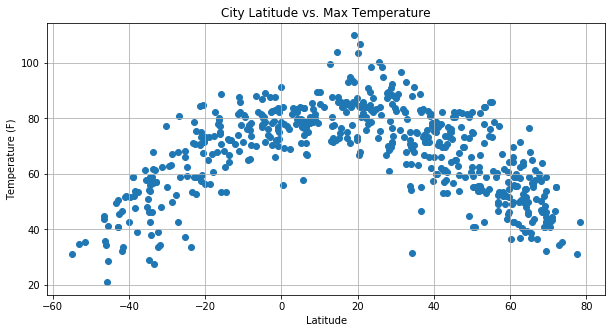

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(city_df['Latitude'], city_df['Temperature'], marker="o")
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
#ranges are based on example.pdf
# plt.ylim(-100, 150, 50)
# plt.xlim(-80, 100, 20)
plt.grid(True)

plt.show()

## Latitude vs. Humidity Plot

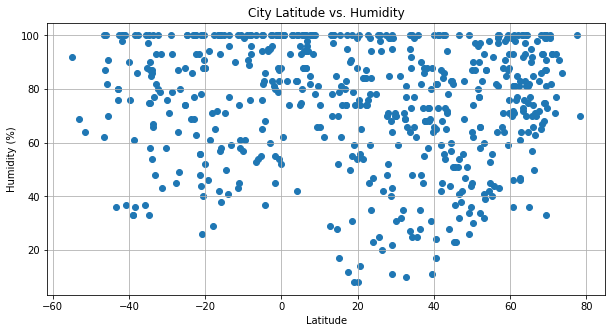

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(city_df['Latitude'], city_df['Humidity'], marker="o")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
#ranges are based on example.pdf
# plt.ylim(-20, 120, 20)
# plt.xlim(-80, 100, 20)
plt.grid(True)

plt.show()

## Latitude vs. Cloudiness Plot

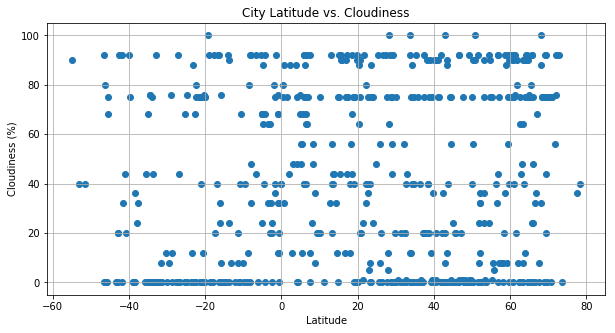

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(city_df['Latitude'], city_df['Cloudiness'], marker="o")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
#ranges are based on example.pdf
# plt.ylim(-20, 120, 20)
# plt.xlim(-80, 100, 20)
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

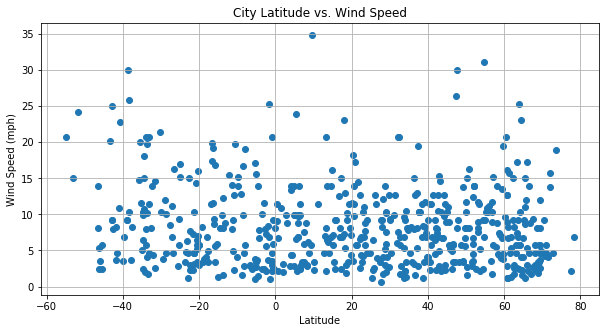

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(city_df['Latitude'], city_df['Wind Speed'], marker="o")
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
#ranges are based on example.pdf
# plt.ylim(-5, 40, 5)
# plt.xlim(-80, 100, 20)
plt.grid(True)

plt.show()

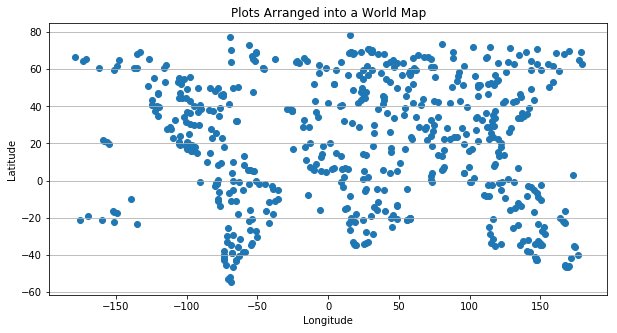

In [13]:
#cool it's a world map
plt.figure(figsize=(10,5))
plt.scatter(city_df['Longitude'], city_df['Latitude'])
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True, axis='y')
plt.title("Plots Arranged into a World Map")
plt.show()